# Task 1: Movie Genre Classification

Create a machine learning model that can predict the genre of a movie based on its plot summary or other textual information. You can use techniques like TF-IDF or word embeddings with classifiers such as Naive Bayes, Logistic Regression, or Support Vector Machines (SVM).

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from scipy.sparse import issparse

# Data Preprocessing

In [36]:
#load the dataset
train_data= pd.read_csv("C:/Users/mahi/Documents/Genre Classification Dataset/train_data.txt", delimiter=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], engine='python') 

test_data= pd.read_csv("C:/Users/mahi/Documents/Genre Classification Dataset/test_data.txt", delimiter=':::', names=['ID', 'TITLE', 'DESCRIPTION'], engine='python')

test_data_solution= pd.read_csv("C:/Users/mahi/Documents/Genre Classification Dataset/test_data_solution.txt", delimiter=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], engine='python')

In [37]:
#train_data
print("Train Data:")
print(display(train_data.head()))
print(train_data.shape)

#test_data
print("Test Data:")
print(display(test_data.head()))
print(test_data.shape)

#test_data_solution
print("Test Data Solution:")
print(display(test_data_solution.head()))
print(test_data_solution.shape)


Train Data:


,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


None
(54214, 4)
Test Data:


,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


None
(54200, 3)
Test Data Solution:


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


None
(54200, 4)


In [38]:
#Check for missing values
print("Train Data:\n")
print(train_data.isnull().sum())

print("\nTest Data:\n")
print(test_data.isnull().sum())

print("\nTest Data Solution:\n")
print(test_data_solution.isnull().sum())

Train Data:

ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

Test Data:

ID             0
TITLE          0
DESCRIPTION    0
dtype: int64

Test Data Solution:

ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64


In [39]:
#Statistical properties
print("Train Data:\n")
print(train_data.describe())

print("\nTest Data:\n")
print(test_data.describe())

print("\nTest Data Solution:\n")
print(test_data_solution.describe())

Train Data:

                 ID
count  54214.000000
mean   27107.500000
std    15650.378084
min        1.000000
25%    13554.250000
50%    27107.500000
75%    40660.750000
max    54214.000000

Test Data:

                 ID
count  54200.000000
mean   27100.500000
std    15646.336632
min        1.000000
25%    13550.750000
50%    27100.500000
75%    40650.250000
max    54200.000000

Test Data Solution:

                 ID
count  54200.000000
mean   27100.500000
std    15646.336632
min        1.000000
25%    13550.750000
50%    27100.500000
75%    40650.250000
max    54200.000000


# Feature Extraction


In [40]:
#convert text data into numerical form 
#preprocess the text
train_data['DESCRIPTION'] = train_data['DESCRIPTION'].str.lower()  
train_data['DESCRIPTION'] = train_data['DESCRIPTION'].str.replace('[^]', '')
#TF-IDF Vectorization
vectorizer=TfidfVectorizer(stop_words=['english'], max_features=3000)
X_train_tfidf = vectorizer.fit_transform(train_data['DESCRIPTION'])
X_test_tfidf = vectorizer.transform(test_data['DESCRIPTION'])
#label encoding
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(train_data['GENRE'])
y_test_enc = label_encoder.transform(test_data_solution['GENRE'])

# Data Visualization 


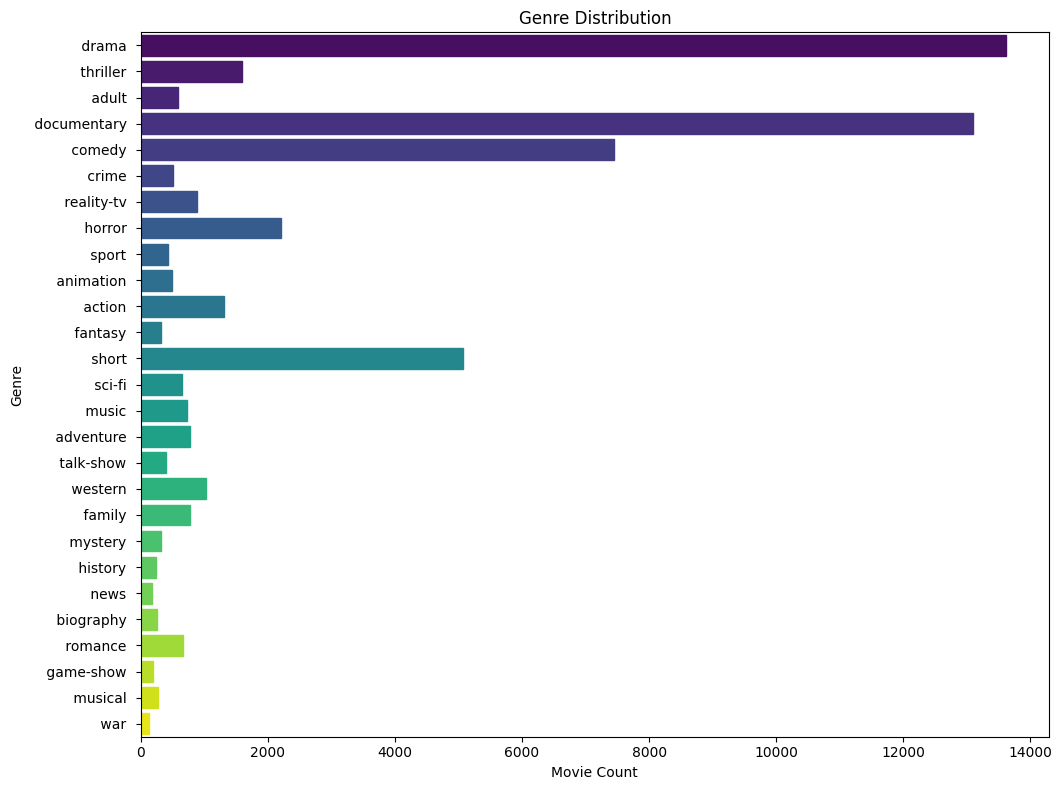

In [41]:
#Barplot of Movie Count per Genre 
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
ax = sns.countplot(data=train_data, y='GENRE')
plt.title('Genre Distribution')
plt.xlabel('Movie Count')
plt.ylabel('Genre')
plt.tight_layout()

# Applying the palette after creating the countplot
for bar, color in zip(ax.patches, sns.color_palette('viridis', len(ax.patches))):
    bar.set_color(color)

plt.show()


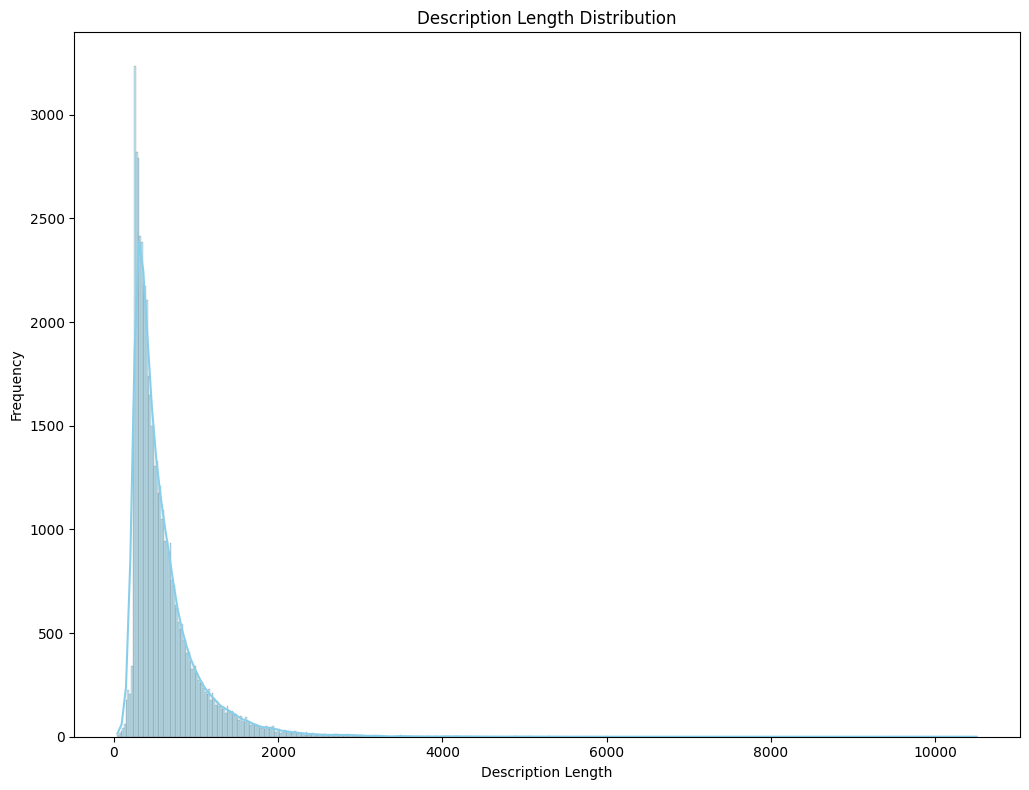

In [42]:
#Histogram of Description Length Distribution 
train_data['DESCRIPTION_LENGTH'] = train_data['DESCRIPTION'].str.len()
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.histplot(data=train_data, x='DESCRIPTION_LENGTH', kde=True, color='skyblue')
plt.title('Description Length Distribution')
plt.xlabel('Description Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Model Training


In [43]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf,y_train_enc, test_size=0.2, random_state=42)

In [44]:
#train a Naive Bayes model
Mnb_model = MultinomialNB()
Mnb_model.fit(X_train, y_train)

MultinomialNB()

In [45]:
# Make predictions
y_pred= Mnb_model.predict(X_test)
print(y_pred)

[ 8  8  7 ...  8  8 13]


In [46]:
#train a Logistic Regression model
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [47]:
y_pred_lr = lr_model.predict(X_test)
print(y_pred_lr)

[ 8  8 13 ...  8 21 13]


In [48]:
# train a SVC model
# Reduce the dataset size for testing
X_train_sample = X_train_scaled[:1000]
y_train_sample = y_train[:1000]

svm_model = SVC(kernel='linear', verbose=True)
svm_model.fit(X_train_sample, y_train_sample)

[LibSVM]

SVC(kernel='linear', verbose=True)

In [49]:
# Make predictions with SVM
y_pred_svm = svm_model.predict(X_test_scaled)

# Model Evaluation

Naive Bayes Model:

In [50]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.5080697224015494
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.06      0.10       263
           1       0.75      0.03      0.05       112
           2       0.50      0.01      0.03       139
           3       0.00      0.00      0.00       104
           4       0.00      0.00      0.00        61
           5       0.51      0.38      0.43      1443
           6       0.00      0.00      0.00       107
           7       0.56      0.89      0.69      2659
           8       0.44      0.83      0.58      2697
           9       1.00      0.01      0.01       150
          10       0.00      0.00      0.00        74
          11       1.00      0.10      0.18        40
          12       0.00      0.00      0.00        45
          13       0.74      0.25      0.38       431
          14       0.76      0.15      0.25       144
          15       0.00      0.00      0.00        50
          16       0.00      

Logistic Regression Model:

In [51]:
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr,zero_division=0))

Accuracy: 0.5826800700913032
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.25      0.33       263
           1       0.72      0.23      0.35       112
           2       0.37      0.10      0.16       139
           3       0.62      0.08      0.14       104
           4       0.00      0.00      0.00        61
           5       0.52      0.58      0.55      1443
           6       0.14      0.01      0.02       107
           7       0.67      0.86      0.75      2659
           8       0.54      0.78      0.64      2697
           9       0.39      0.09      0.15       150
          10       0.00      0.00      0.00        74
          11       1.00      0.47      0.64        40
          12       0.00      0.00      0.00        45
          13       0.60      0.54      0.57       431
          14       0.64      0.52      0.57       144
          15       0.50      0.02      0.04        50
          16       1.00      

SVM Model:

In [52]:

print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:")
print(classification_report(y_test, y_pred_svm,zero_division=0))

Accuracy: 0.4282025269759292
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.04      0.07       263
           1       0.00      0.00      0.00       112
           2       0.36      0.03      0.05       139
           3       0.00      0.00      0.00       104
           4       0.00      0.00      0.00        61
           5       0.31      0.39      0.34      1443
           6       0.14      0.01      0.02       107
           7       0.54      0.78      0.64      2659
           8       0.41      0.67      0.50      2697
           9       0.00      0.00      0.00       150
          10       0.00      0.00      0.00        74
          11       1.00      0.07      0.14        40
          12       0.00      0.00      0.00        45
          13       0.66      0.05      0.09       431
          14       0.60      0.02      0.04       144
          15       0.00      0.00      0.00        50
          16       0.00      